- **제출자: AI26_오준서**  
- **제출일: 2025-06-16**  
- **PBL05 : 과목별 성적 분석을 통한 학생 성과 시각화 (난수 기반 성적 데이터를 활용한 통계 분석 및 시각화)**
- **20명의 학생의 과목별 성적 데이터를 분석하여 통계적 인사이트를 시각적으로 제공**
    - **StudentScoreAnalysis 클래스 정의**
    - **이름: '학생1' ~'학생20'**
    - **과목: 수학, 영어, 과학 (각50~100 사이 난수)**
    - **분석 요구사항:** 
        - **과목별 평균 정수 막대 그래프 시각화**
        - **평균 성적 상위 5명 막대 그래프 시각화**
    
- **해결 가이드**
    - **__init__: 학생 성적 데이터프레임 생성**
    - **평균 계산 및 정렬 : mean() + sort_values()**
    - **시각화 : plt.bar()**

- 시각화 구성 미치 정확성
    > 축 라벨, 색상, 제목 포함 여부
- 데이터 생성 및 분석 로직:
    > 난수 생성 범위, 정렬 정확성, 평균 계산
- 클래스 구조 및 주석 처리:
    > 캡슐화 및 메서드 분리 여부

,이름,수학,영어,과학,평균
0,학생1,77,100,90,89.00
1,학생2,72,64,94,76.67
2,학생3,63,74,67,68.00
3,학생4,73,86,96,85.00
4,학생5,51,77,85,71.00
5,학생6,94,59,96,83.00
6,학생7,75,88,71,78.00
7,학생8,63,66,83,70.67
8,학생9,100,88,96,94.67
9,학생10,56,71,57,61.33


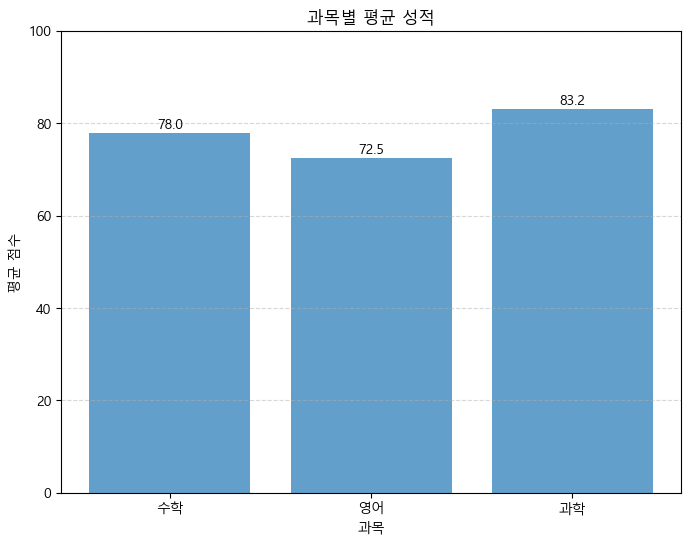

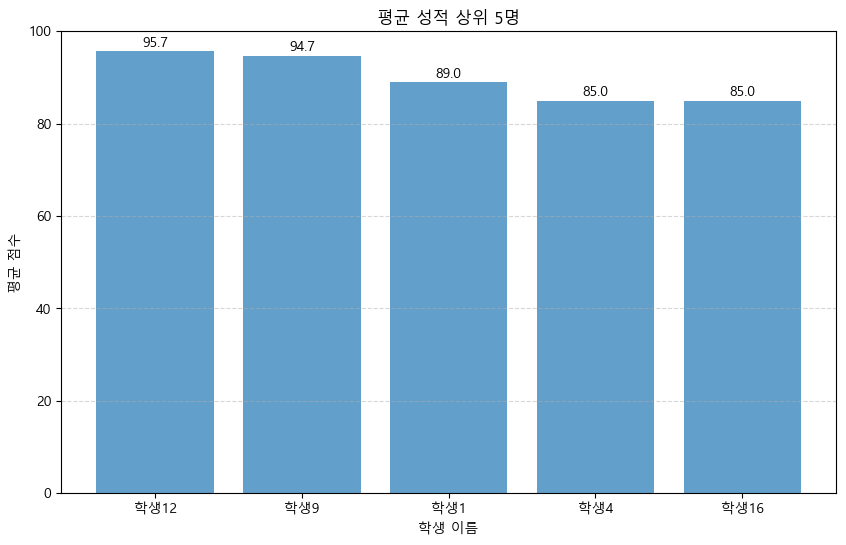

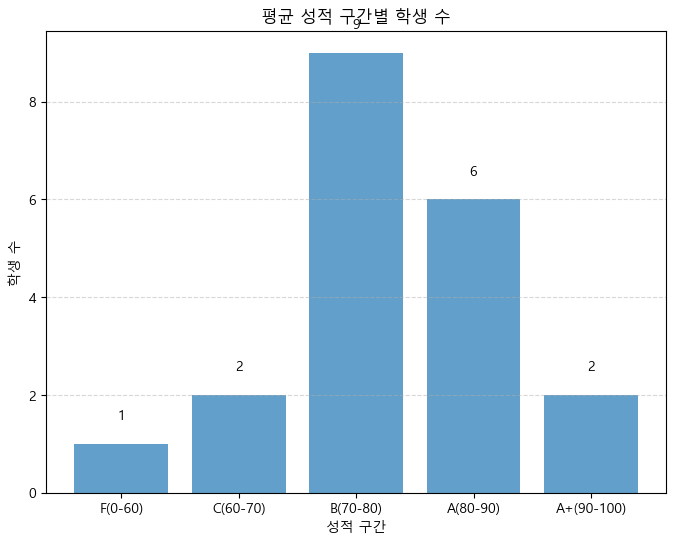

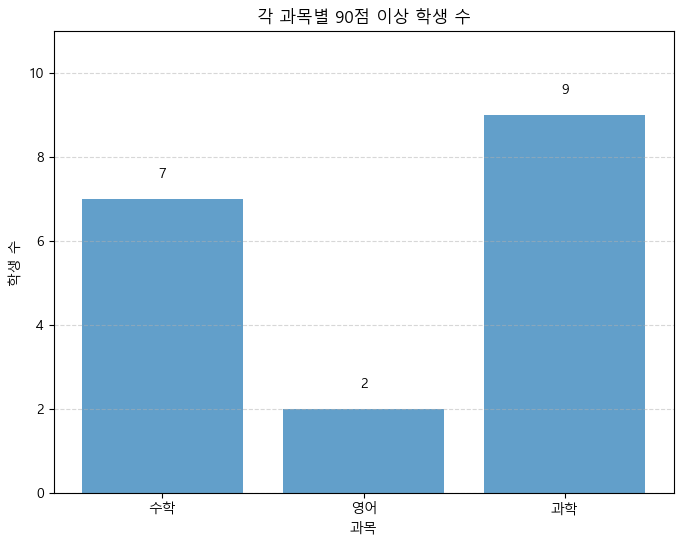

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import List
from IPython.display import display

# ----------------------------
# pandas 한글 문자 폭 설정
# ----------------------------
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.unicode.ambiguous_as_wide', True)

# ----------------------------
# matplotlib 한글 폰트 설정
# ----------------------------
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

class StudentScoreAnalysis:
    def __init__(self, student_count: int = 20):
        """
        초기화 메서드: 학생 수 설정 후 성적 DataFrame 생성
        :student_count: 생성할 학생 수
        """
        self.student_count = student_count
        self.subjects = ['수학', '영어', '과학']
        self.df_scores = self.generate_random_scores()

    def generate_random_scores(self):
        """
        난수 기반 성적 DataFrame 생성 (50~100)
        :return: 학생 성적 DataFrame
        """
        scores = {'이름': [f'학생{i+1}' for i in range(self.student_count)]}
        for subject in self.subjects:
            scores[subject] = np.random.randint(50, 101, self.student_count)
        df = pd.DataFrame(scores)
        df['평균'] = df[self.subjects].mean(axis=1).round(2)
        return df

    def print_dataframe(self):
        """
        DataFrame을 Jupyter/콘솔 환경에서 예쁘게 출력
        """
        try:
            display(self.df_scores)
        except ImportError:
            print(self.df_scores.to_string(index=False))

    def plot_subject_averages(self):
        """
        과목별 평균 성적을 바 차트로 시각화
        """
        means = self.df_scores[self.subjects].mean()
        plt.figure(figsize=(8, 6))
        bars = plt.bar(means.index, means.values, alpha=0.7)
        plt.title('과목별 평균 성적')
        plt.xlabel('과목')
        plt.ylabel('평균 점수')
        plt.ylim(0, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{bar.get_height():.1f}', ha='center')
        plt.show()

    def plot_top5_students(self):
        """
        평균 성적 상위 5명 바 차트로 시각화
        """
        top5 = self.df_scores.sort_values(by='평균', ascending=False).head(5)
        plt.figure(figsize=(10, 6))
        bars = plt.bar(top5['이름'], top5['평균'], alpha=0.7)
        plt.title('평균 성적 상위 5명')
        plt.xlabel('학생 이름')
        plt.ylabel('평균 점수')
        plt.ylim(0, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{bar.get_height():.1f}', ha='center')
        plt.show()

    def plot_grade_category_bar(self):
        """
        평균 점수 기준으로 F/C/B/A/A+ 구간별 학생 수를 바 차트로 시각화
        """
        bins = [0, 60, 70, 80, 90, 100]
        labels = ['F(0-60)', 'C(60-70)', 'B(70-80)', 'A(80-90)', 'A+(90-100)']
        categories = pd.cut(self.df_scores['평균'], bins=bins, labels=labels, right=False)
        counts = categories.value_counts().sort_index()
        plt.figure(figsize=(8, 6))
        bars = plt.bar(counts.index, counts.values, alpha=0.7)
        plt.title('평균 성적 구간별 학생 수')
        plt.xlabel('성적 구간')
        plt.ylabel('학생 수')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{int(bar.get_height())}', ha='center')
        plt.show()

    def plot_high_achievers(self, threshold: int = 90):
        """
        각 과목별로 threshold 이상 점수를 받은 학생 수를 바 차트로 시각화
        :param threshold: 우수 성적 기준 (기본값: 90)
        """
        counts = [int((self.df_scores[sub] >= threshold).sum()) for sub in self.subjects]
        plt.figure(figsize=(8, 6))
        bars = plt.bar(self.subjects, counts, alpha=0.7)
        plt.title(f'각 과목별 {threshold}점 이상 학생 수')
        plt.xlabel('과목')
        plt.ylabel('학생 수')
        plt.ylim(0, max(counts) + 2)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{int(bar.get_height())}', ha='center')
        plt.show()

if __name__ == '__main__':
    analyzer = StudentScoreAnalysis()       # 클래스 인스턴스 생성
    analyzer.print_dataframe()               # 성적표 출력
    analyzer.plot_subject_averages()         # 과목별 평균 성적을 막대 그래프로 시각화
    analyzer.plot_top5_students()            # 평균 성적 상위 5명을 막대 그래프로 시각화
    analyzer.plot_grade_category_bar()      # 성적 구간별 학생 수(F/C/B/A/A+)
    analyzer.plot_high_achievers(90)        # 각 과목별 90점 이상 학생 수
